In [53]:

from engine import Value
from nn import MLP
import random
import numpy as np
from graphviz import Digraph


In [54]:
def trace(root):
    # builds sets of nodes and edges in the graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for c in v._children:
                edges.add((c,v))
                build(c)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir':'LR'}) # left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid,label=f'v:{n.data:.2f}, ∂(L)/∂(v):{n.grad:.2f}',shape='record')
        if n._op:
            # if the node is a result of some operation, create entering op node to it
            dot.node(name=uid+n._op, label=n._op) # create op node
            dot.edge(uid+n._op, uid) # edge from op symbol to op result
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op) # edge from previous value to next op symbol

    return dot


In [57]:
random.seed(42)
nn_example = MLP(3,[1,1],'relu')
X_train_example = [
    [1.0, 2.0, 3.0],
]
y_train_example = [5.0,]
y_pred_example = nn_example(X_train_example[0])[0]
loss_example = (y_pred_example - y_train_example[0])**2

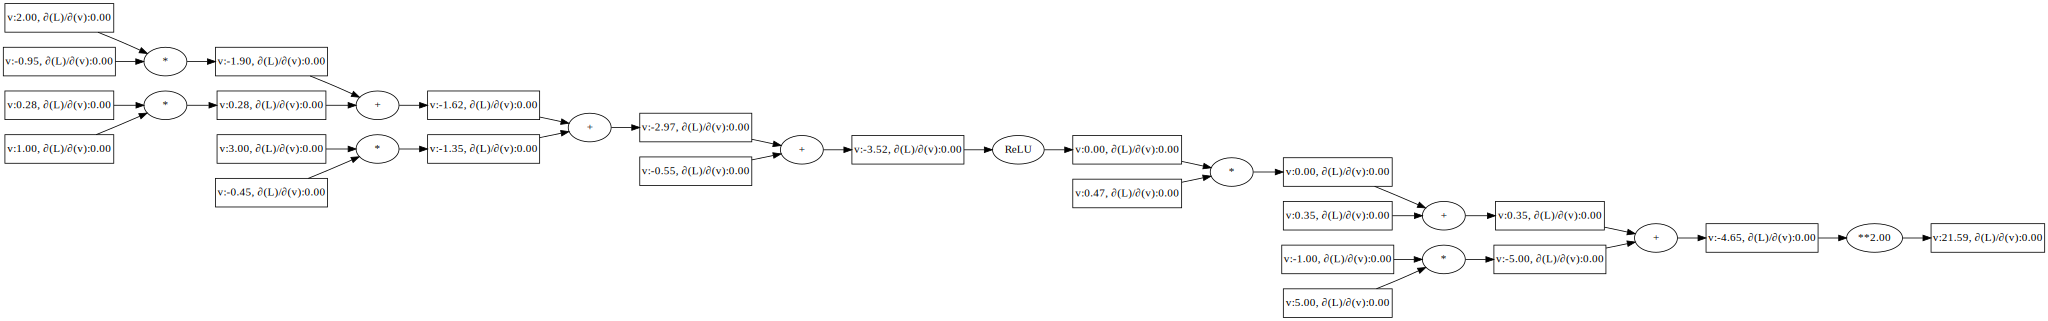

In [58]:
draw_dot(loss_example)

In [ ]:
loss_example.backward()

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
random.seed(42)
nn = MLP(3,[2,1],'relu')


X_train = [
    [1.0, 2.0, 3.0],
    [0.0, 1.0, 0.0],
    [0.5, 1.0, 3.0],
        
]
y_train = [1.0, 2.0, 3.0] 

n_epoch = 3
lr = 0.01
for ep in range(n_epoch):
    # loss_data = Value(0.0)
    loss = 0.0
    for xi,yi in zip(X_train,y_train):
        yi_pred = nn(xi)[0]

        loss_i = (yi_pred - yi)**2
        loss = loss_i + loss
    
    # loss = Value(loss_data, children=(y_pred,))
    for p in nn.parameters():
        p.grad = 0 
    loss.backward() # get d(L)/d(p) for each parameter p in the network 
    for p in nn.parameters():
        p.value -= lr * p.grad # Update network params: p -= lr * d(L)/d(p)


ValueError: not enough values to unpack (expected 2, got 0)